In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random as r
import copy
%matplotlib inline

In [2]:
class City:
    
    def __init__(self, N = 50, threshold = 0.5):
        self.threshold =threshold
        self.N = N
        self.map = np.random.randint(2, size = (self.N,self.N))
        self.number_of_dis = []
        self.map_evolution = [copy.deepcopy(self.map)]

    def plotMap(self):
        plt.figure(figsize = (7, 5)) 
        plt.imshow(self.map, cmap="binary")

    def countNeighbours(self, index_x, index_y):
        number_of_neighbours = 0
        current_agent = self.map[index_x,index_y]
            
        neighbour_index = [[index_x,index_y-1] , 
                          [index_x,(index_y+1)%self.N] , 
                          [index_x-1,index_y] , 
                          [(index_x+1)%self.N,index_y] , 
                          [index_x-1,index_y-1] , 
                          [index_x-1,(index_y+1)%self.N] , 
                          [(index_x+1)%self.N,index_y-1] , 
                          [(index_x+1)%self.N,(index_y+1)%self.N]]
        
    
        for i in neighbour_index:
            if self.map[i[0], i[1]] == current_agent:
                number_of_neighbours +=1
                  
        return number_of_neighbours

    def oneStep(self, is_print = False):
        wants_to_move = []
        
        for i in range(self.N):
            
            for j in range(self.N):
                
                if self.countNeighbours(i,j)/8 < self.threshold:
                    
                    wants_to_move.append([i,j])
                    
                    if is_print:
                        
                        print(f'Agent {self.map[i,j]} - {i,j} wants to move')

        return wants_to_move
        ## add check for one point
                        
        # findout who wants to move
        
            
    def start_moving(self,n_iter = 5):
#         wants_to_move= self.oneStep()
#         print('wants - ',wants_to_move,'\n')
        for nIt in range(n_iter):
            
            wants_to_move= self.oneStep()
            self.number_of_dis.append(len(wants_to_move))
            for i in wants_to_move:
#                 print('cycle - ',wants_to_move,'\n')
                newPlace = r.choice(wants_to_move)
#                 print('Current - ',i,'\n')
#                 print('newPlace - ',newPlace,'\n')
                map_temp = self.map[newPlace[0],newPlace[1]]
                self.map[newPlace[0],newPlace[1]] = self.map[i[0], i[1]]
                self.map[i[0], i[1]] = map_temp
             
#                 wants_to_move= self.oneStep()
            self.map_evolution.append(copy.deepcopy(self.map))   
                
        self.number_of_dis.append(len(wants_to_move))
        
        plt.figure(figsize = (7, 5)) 
        plt.title(f'R - {self.threshold}')
        plt.imshow(self.map, cmap="binary")
#         self.plotMap()
        
    def animation(self):
        t = np.linspace(0, len(self.map_evolution), int(len(self.map_evolution)))
        fig, ax = plt.subplots(figsize=(14,11))
        ax.set_xlabel('N', fontsize=20)
        ax.set_ylabel('N', fontsize=20)
        ax.set_title(f'R - {self.threshold}')
        cax = ax.imshow(self.map_evolution[0], cmap="binary")
        def animate(i):
#             print(i)
            return ax.imshow(self.map_evolution[i], cmap="binary")

        anim = FuncAnimation(fig, animate, interval=300, frames=len(t))
        anim.save(f'task3 - R- {self.threshold}.gif')

In [3]:
cities = [City(N=100, threshold= x) for x in [0,1/8,2/8,3/8,4/8,5/8,6/8,7/8,1]]

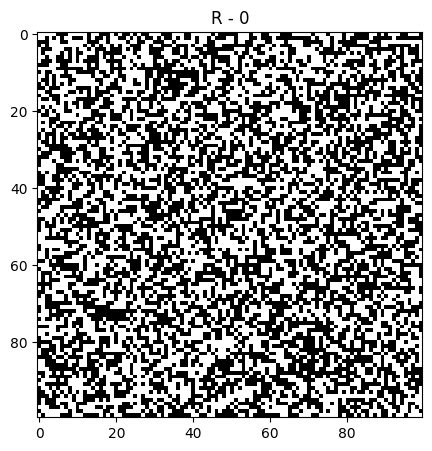

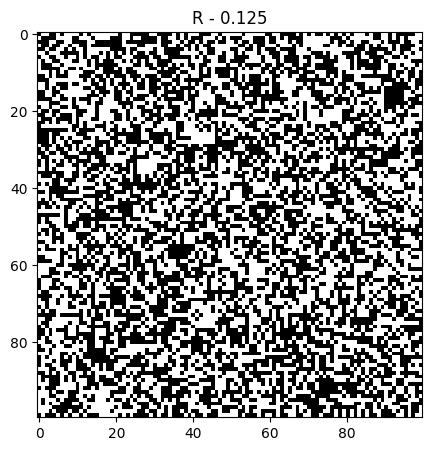

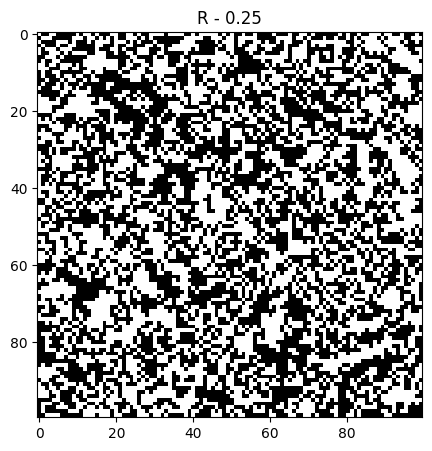

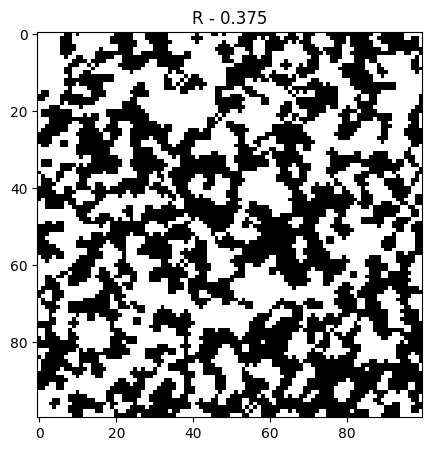

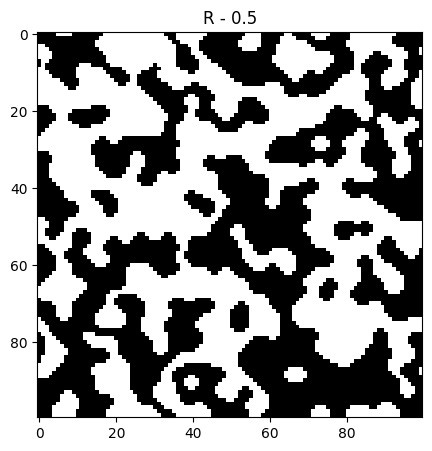

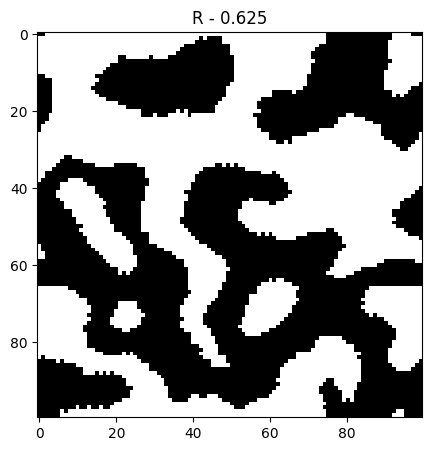

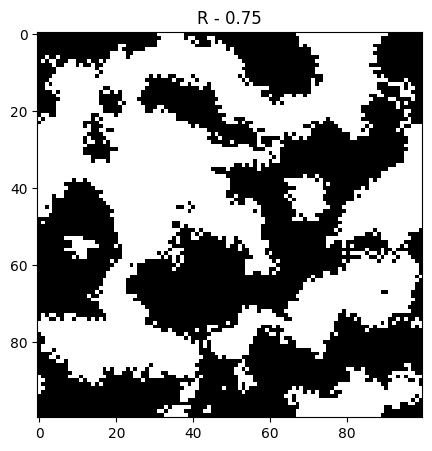

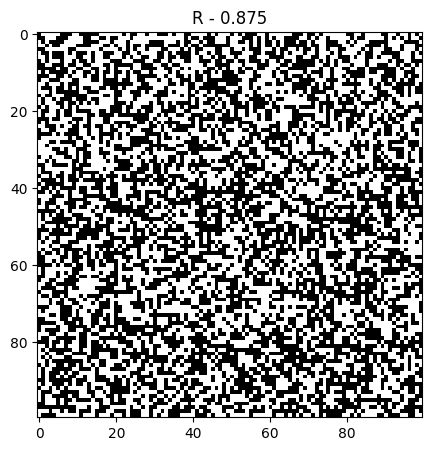

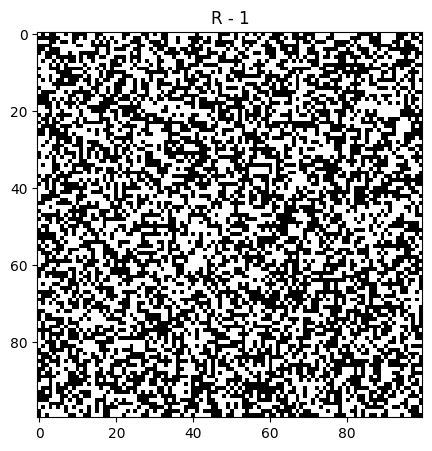

In [4]:
for i in cities:
    i.start_moving(n_iter=40)

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


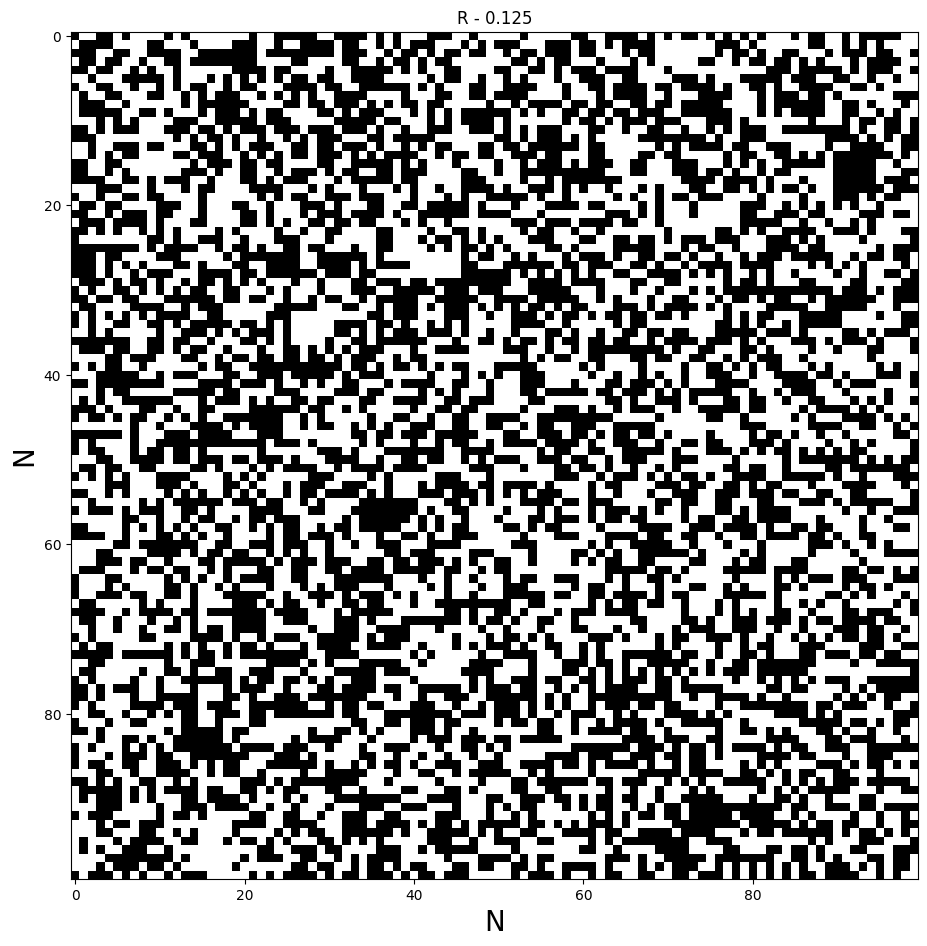

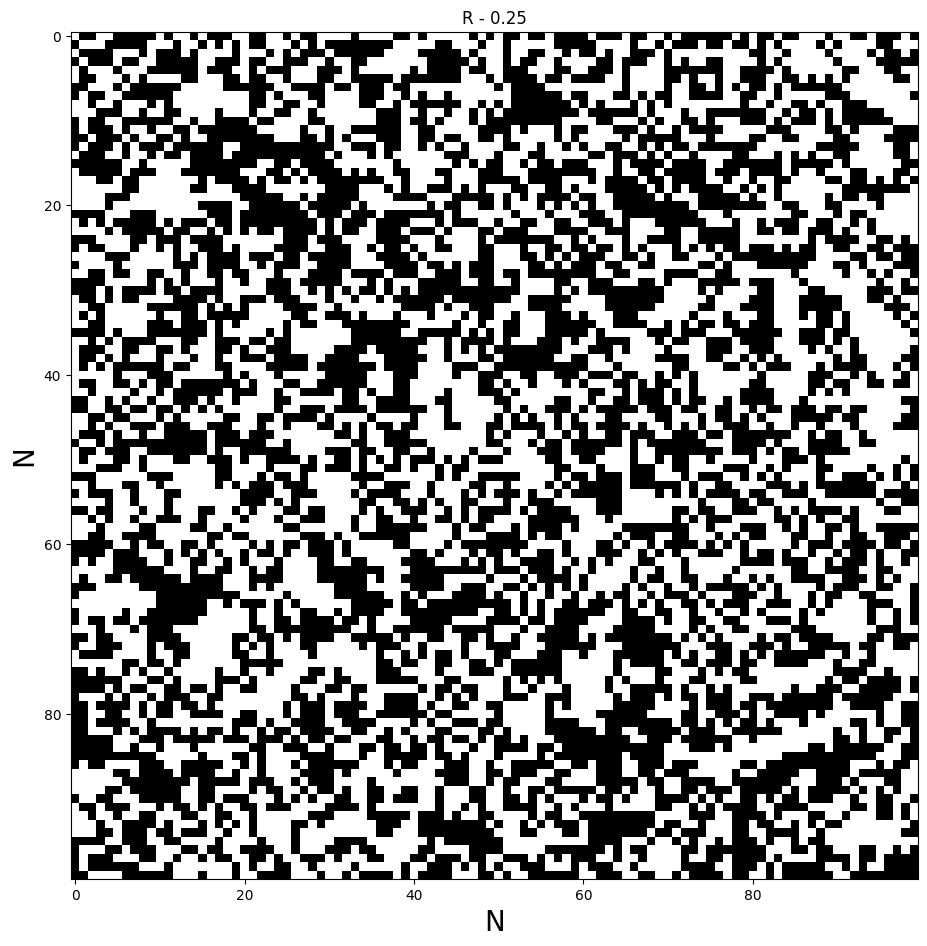

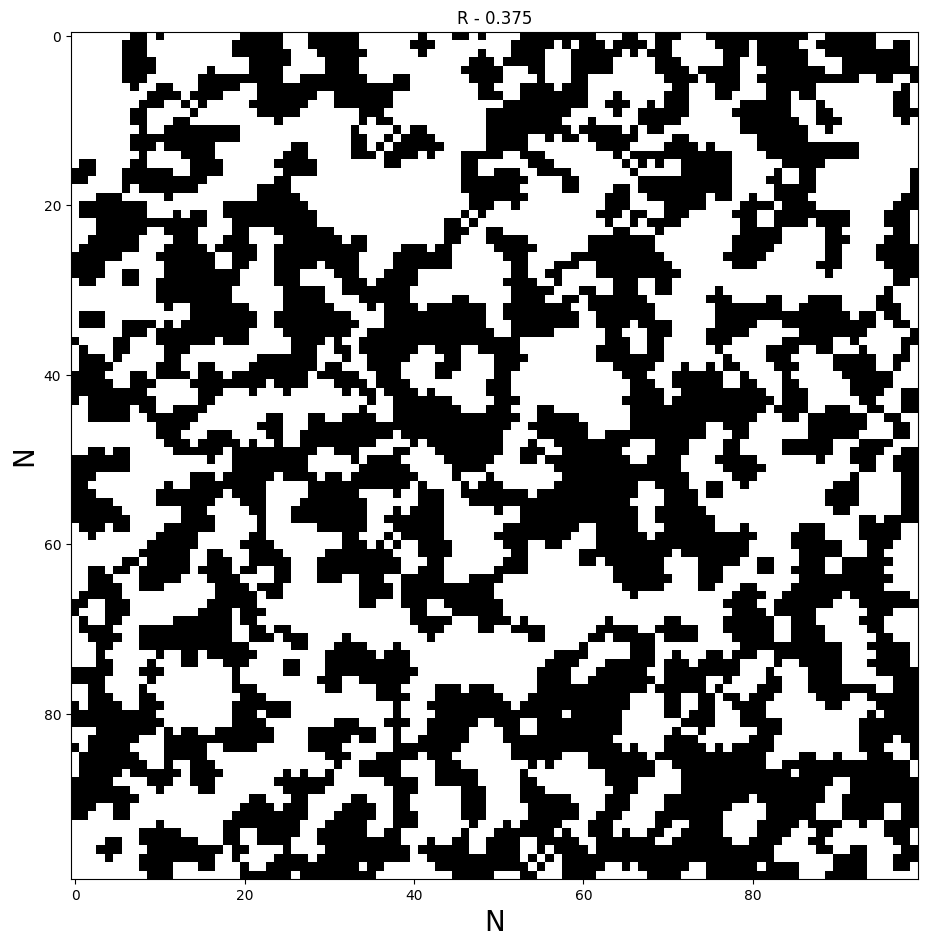

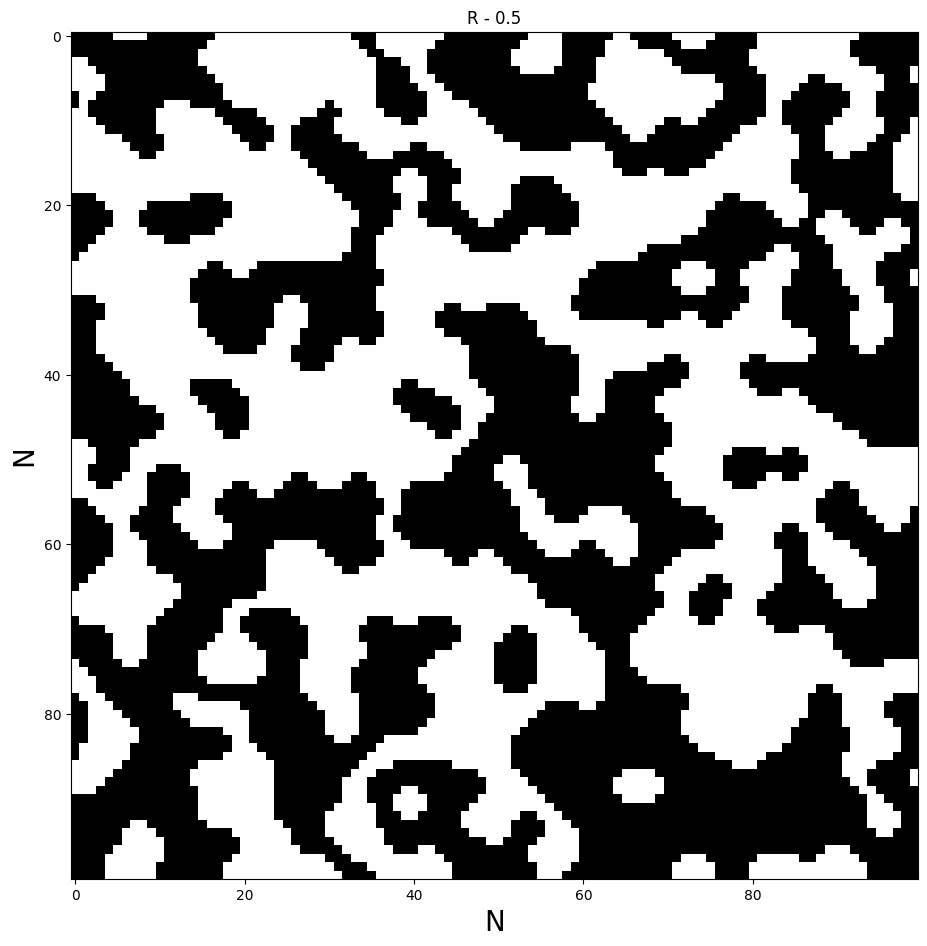

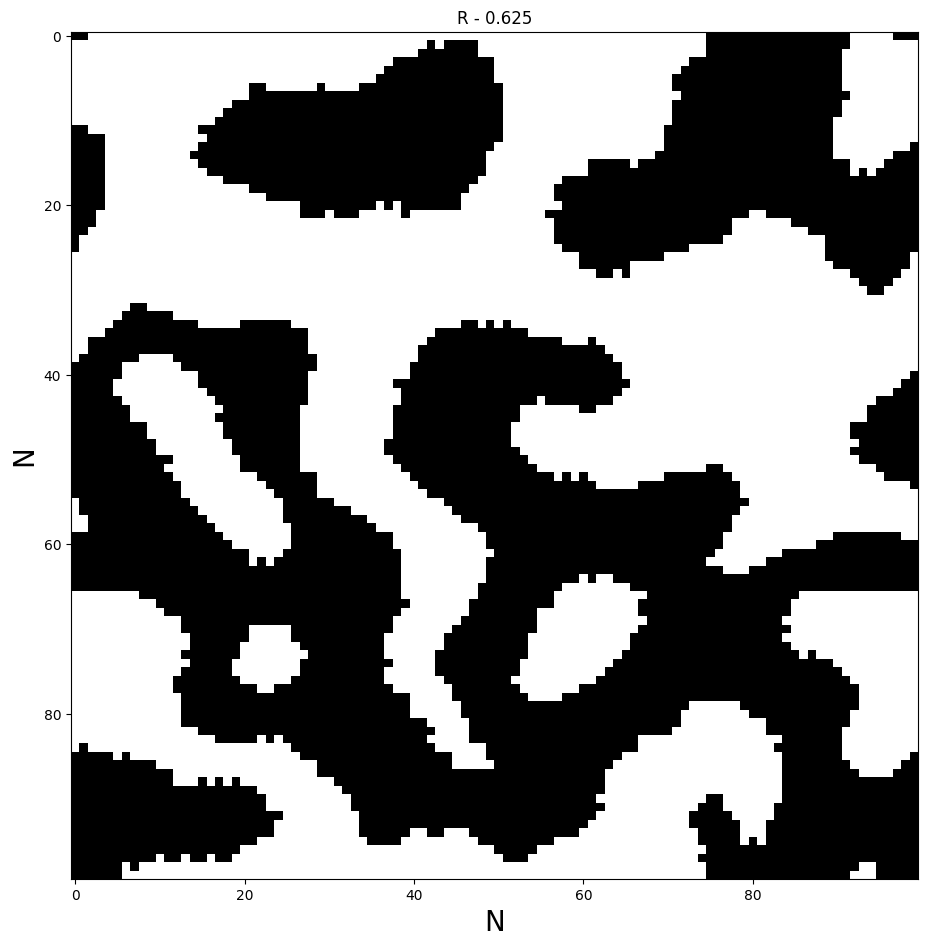

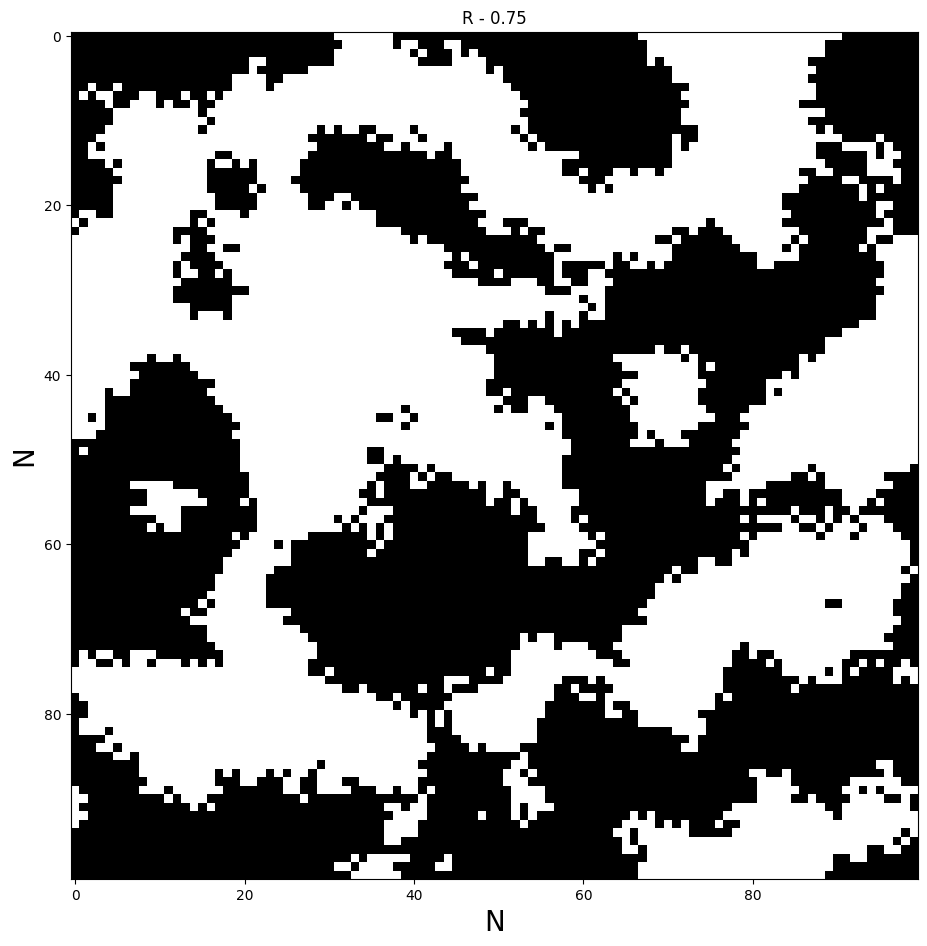

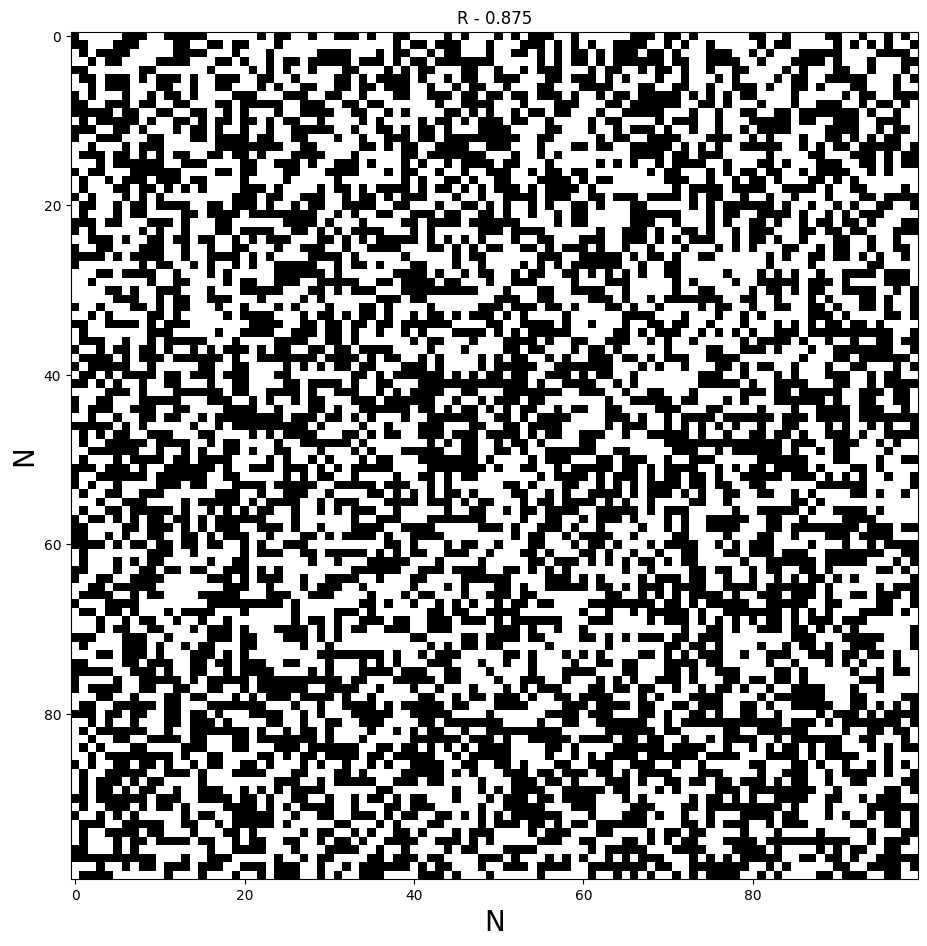

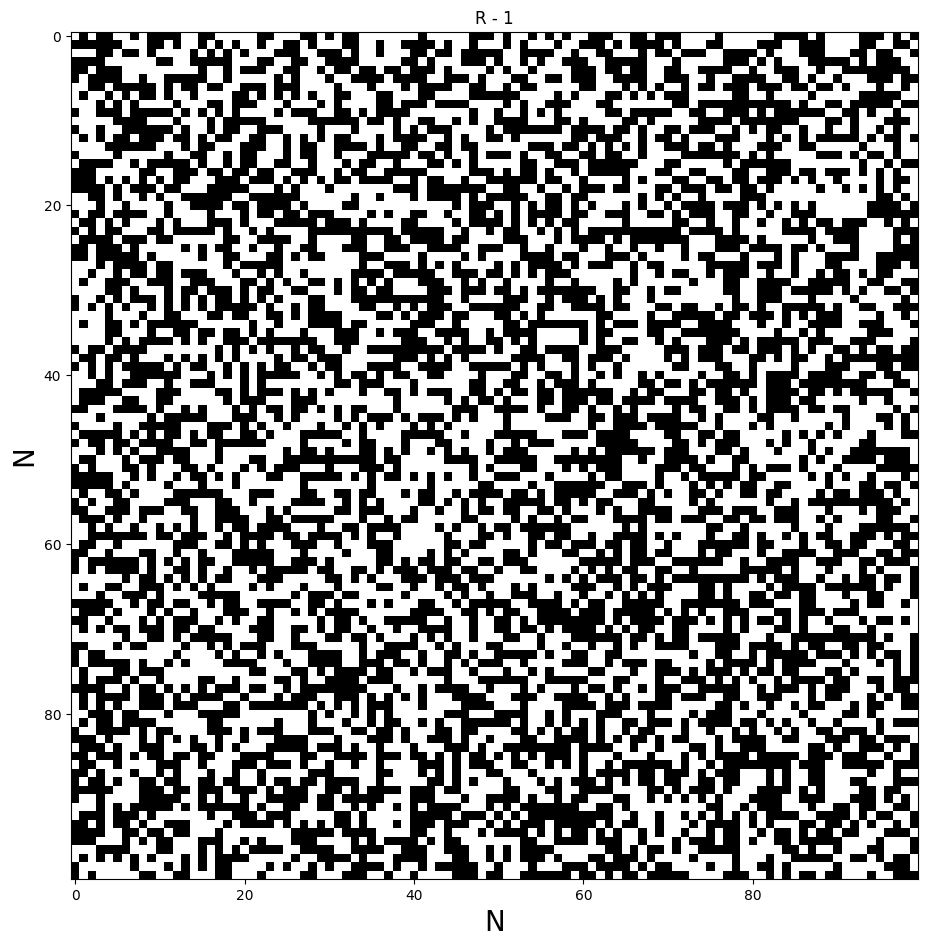

In [5]:
for i in cities[1:]:
    i.animation()

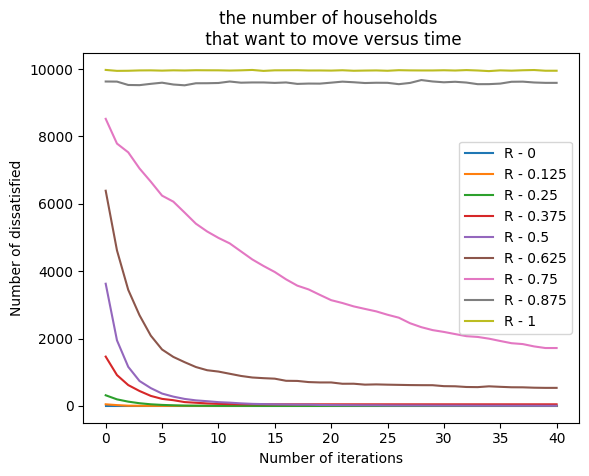

In [6]:
for i in cities:
    plt.title("the number of households \n that want to move versus time")
    plt.plot(i.number_of_dis, label =f'R - {i.threshold}')
    plt.xlabel('Number of iterations')
    plt.ylabel('Number of dissatisfied')
    plt.legend()

In [7]:
class City1:
    def __init__(self, N = 50, threshold = 0.5):
        self.threshold =threshold
        self.N = N
        self.map = np.random.randint(3, size = (self.N,self.N))

    def plotMap(self):
        plt.figure(figsize = (7, 5)) 
        plt.imshow(self.map, cmap="Greys")

    def countNeighbours(self, index_x, index_y):
        number_of_neighbours = 0
        current_agent = self.map[index_x,index_y]
        if current_agent == 0:
            return ('This is empty place')
            
        neighbour_index = [[index_x,index_y-1] , 
                          [index_x,(index_y+1)%self.N] , 
                          [index_x-1,index_y] , 
                          [(index_x+1)%self.N,index_y] , 
                          [index_x-1,index_y-1] , 
                          [index_x-1,(index_y+1)%self.N] , 
                          [(index_x+1)%self.N,index_y-1] , 
                          [(index_x+1)%self.N,(index_y+1)%self.N]]
        
    
        for i in neighbour_index:
            if self.map[i[0], i[1]] == current_agent:
                number_of_neighbours +=1


            
                        
                        
        return number_of_neighbours

    def oneStep(self, is_print = False, only_empty = False):
#         wants_to_move = np.empty(0, dtype = int)
        wants_to_move = []
        empty_place = []
        if not only_empty:
            for i in range(self.N):
                for j in range(self.N):
                    if type(self.countNeighbours(i,j)) == str:
                        empty_place.append([i,j])
                        continue
                    else:
                        if self.countNeighbours(i,j)/8 < self.threshold:
                            wants_to_move.append([i,j])
                            if is_print:
                                print(f'Agent {self.map[i,j]} - {i,j} wants to move')

            return wants_to_move
        else :
            for i in range(self.N):
                for j in range(self.N):
                    if type(self.countNeighbours(i,j)) == str:
                        empty_place.append([i,j])
            return empty_place
                        
        # findout who wants to move
    
    def start_moving(self,n_iter = 5):
        wants_to_move= self.oneStep()
        for nIt in range(n_iter):
            for i in wants_to_move:
                empty_place = self.oneStep(only_empty=True)
#                 distances = {}
#                 for ind, j in enumerate(empty_place):
#                     distances[ind] = max(abs(i[0] - j[0]), abs(i[1] - j[1]))

# #                 print(distances, '\n')
#                 distances = sorted(distances.items(), key = lambda x : x[1])
# #                 print('sorted -',distances, '\n')
#                 min = 10
#                 for m in distances:
#                     if m[1] < min:
#                         min = m[1]

#                 distances = list(filter(lambda item: item[1] == min,distances))

# #                 print('filt -',distances, '\n')

#                 distances = r.choice(distances)

# #                 print('rand -',distances, '\n')
#                 self.map[empty_place[distances[0]][0],empty_place[distances[0]][1]] = self.map[i[0], i[1]]
#                 self.map[i[0], i[1]] = 0
                
                newPlace = r.choice(empty_place)
                self.map[newPlace[0],newPlace[1]] = self.map[i[0], i[1]]
                self.map[i[0], i[1]] = 0
#                 empty_place.pop(distances[0])
#                 empty_place.append([i[0], i[1]])
            wants_to_move= self.oneStep()
        
        self.plotMap()
    
        
                      